In [8]:
#creating data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


boston = pd.read_csv("boston.csv")


Text(0, 0.5, 'median value for houses')

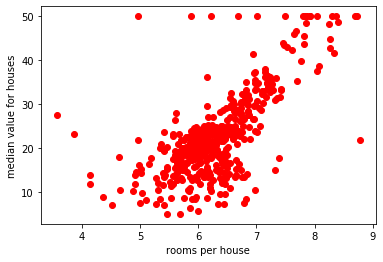

In [11]:
#visualizing data

x = boston['rm']
y = boston['medv']

plt.scatter(x,y, color = 'red')
plt.xlabel('rooms per house')
plt.ylabel('median value for houses')


In [12]:
#selecting target and features

X = pd.DataFrame(boston['rm'])    #targets
Y = pd.DataFrame(boston['medv'])  #features

In [14]:
#splitting the data set into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20)    #test data will be 20% of the total



In [21]:
#building the model with decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 100, max_depth = 4, min_samples_leaf = 1)


#training the model
regressor.fit(X_train,Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [24]:
#predict the values

Y_pred = regressor.predict(X_test)

print(Y_pred[4:9])
print(Y_test[4:9])

[19.90769231 16.74       25.2        19.90769231 16.55930233]
     medv
21   19.6
369  50.0
353  30.1
75   21.4
495  23.1


In [25]:
#lets find rmse value

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_pred,Y_test)
rmse = np.sqrt(mse)
rmse

7.232698475206025

In [26]:
#visualise the tree using graphviz

from sklearn.tree import export_graphviz
export_graphviz(regressor,out_file="regression_tree.dot")